## Switching between styles

Selecting a style to use affects all of the visualizations that are created after this style is selected.

Here, you will practice plotting data in two different styles. The data you will use is the same weather data we used in the first lesson: you will have available to you the DataFrame `seattle_weather` and the DataFrame `austin_weather`, both with records of the average temperature in every month.

Instructions

- Select the `'ggplot'` style, create a new Figure called `fig`, and a new Axes object called `ax` with `plt.subplots`.
- Select the `'Solarize_Light2'` style, create a new Figure called `fig`, and a new Axes object called `ax` with `plt.subplots`.

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Import DataFrames
seattle_weather = pd.read_csv('seattle_weather.csv')
austin_weather = pd.read_csv('austin_weather.csv')

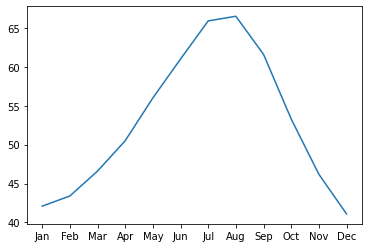

In [2]:
# Use the "ggplot" style and create new Figure/Axes
fig, ax = plt.subplots()
plt.style.use('ggplot')
ax.plot(seattle_weather['MONTH'], seattle_weather['MLY-TAVG-NORMAL'])
plt.show()

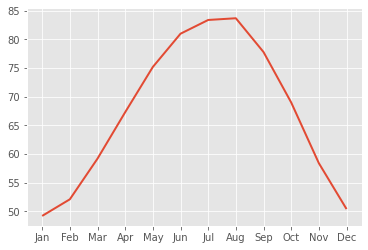

In [3]:
# Use the "Solarize_Light2" style and create new Figure/Axes
fig, ax = plt.subplots()
plt.style.use('Solarize_Light2')
ax.plot(austin_weather['MONTH'], austin_weather['MLY-TAVG-NORMAL'])
plt.show()

## Saving a file several times

If you want to share your visualizations with others, you will need to save them into files. Matplotlib provides as way to do that, through the `savefig` method of the `Figure` object. In this exercise, you will save a figure several times. Each time setting the parameters to something slightly different. We have provided and already created `Figure` object.

Instructions

- Examine the figure by calling the `plt.show()` function.
- Save the figure into the file `my_figure.png`, using the default resolution.
- Save the figure into the file `my_figure_300dpi.png` and set the resolution to 300 dpi.

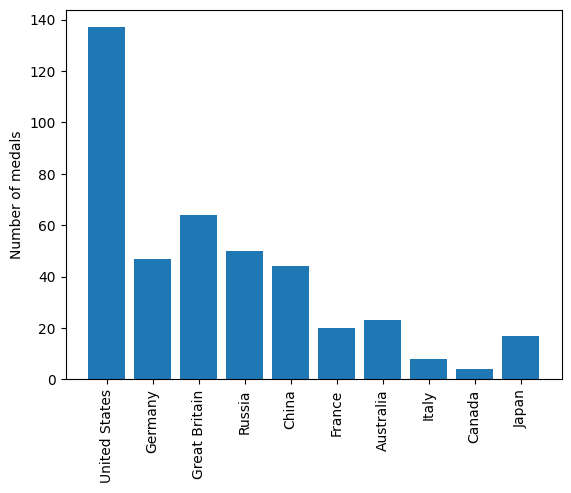

In [9]:
# Previous code
import pandas as pd
import matplotlib.pyplot as plt
medals = pd.read_csv('medals_by_country_2016.csv', index_col=0)
fig, ax = plt.subplots()
ax.bar(medals.index, medals["Gold"])
plt.xticks(rotation=90)
ax.set_ylabel('Number of medals')
plt.style.use('default')

# Show the figure
plt.show()

In [10]:
# Save as a PNG file
fig.savefig('my_figure.png')

In [11]:
# Save as a PNG file with 300 dpi
fig.savefig('my_figure_300dpi.png', dpi=300)

## Save a figure with different sizes

Before saving your visualization, you might want to also set the size that the figure will have on the page. To do so, you can use the `Figure` object's `set_size_inches` method. This method takes a sequence of two values. The first sets the width and the second sets the height of the figure.

Here, you will again have a `Figure` object called `fig` already provided (you can run `plt.show` if you want to see its contents). Use the `Figure` methods `set_size_inches` and `savefig` to change its size and save two different versions of this figure.

Instructions

- Set the figure size as width of 3 inches and height of 5 inches and save it as `'figure_3_5.png'` with default resolution.
- Set the figure size to width of 5 inches and height of 3 inches and save it as `'figure_5_3.png'` with default settings.

In [12]:
# Set figure dimensions and save as a PNG
fig.set_size_inches([3, 5])
fig.savefig('figure_3_5.png')

In [13]:
# Set figure dimensions and save as a PNG
fig.set_size_inches([5, 3])
fig.savefig('figure_5_3.png')

## Unique values of a column

One of the main strengths of Matplotlib is that it can be automated to adapt to the data that it receives as input. For example, if you receive data that has an unknown number of categories, you can still create a bar plot that has bars for each category.

In this exercise and the next, you will be visualizing the weight of medalis in the 2016 summer Olympic Games again, from a dataset that has some unknown number of branches of sports in it. This will be loaded into memory as a Pandas `DataFrame` object called `summer_2016_medals`, which has a column called `"Sport"` that tells you to which branch of sport each row corresponds. There is also a `"Weight"` column that tells you the weight of each athlete.

In this exercise, we will extract the unique values of the `"Sport"` column

Instructions

- Create a variable called `sports_column` that holds the data from the `"Sport"` column of the `DataFrame` object.
- Use the `unique` method of this variable to find all the unique different sports that are present in this data, and assign these values into a new variable called `sports`.
- Print the `sports` variable to the console.

In [15]:
# Import DataFrame
summer_2016_medals = pd.read_csv('summer_2016_medals.csv')

# Extract the "Sport" column
sports_column = summer_2016_medals["Sport"]

# Find the unique values of the "Sport" column
sports = sports_column.unique()

# Print out the unique sports values
sports

array(['Rowing', 'Taekwondo', 'Handball', 'Wrestling', 'Gymnastics',
       'Swimming', 'Basketball', 'Boxing', 'Volleyball', 'Athletics',
       'Rugby Sevens', 'Judo', 'Rhythmic Gymnastics', 'Weightlifting',
       'Equestrianism', 'Badminton', 'Water Polo', 'Football', 'Fencing',
       'Shooting', 'Sailing', 'Beach Volleyball', 'Canoeing', 'Hockey',
       'Cycling', 'Tennis', 'Diving', 'Table Tennis', 'Triathlon',
       'Archery', 'Synchronized Swimming', 'Modern Pentathlon',
       'Trampolining', 'Golf'], dtype=object)

## Automate your visualization

One of the main strengths of Matplotlib is that it can be automated to adapt to the data that it receives as input. For example, if you receive data that has an unknown number of categories, you can still create a bar plot that has bars for each category.

This is what you will do in this exercise. You will be visualizing data about medal winners in the 2016 summer Olympic Games again, but this time you will have a dataset that has some unknown number of branches of sports in it. This will be loaded into memory as a Pandas `DataFrame` object called `summer_2016_medals`, which has a column called `"Sport"` that tells you to which branch of sport each row corresponds. There is also a `"Weight"` column that tells you the weight of each athlete.

Instructions

- Iterate over the values of `sports` setting `sport` as your loop variable.
- In each iteration, extract the rows where the `"Sport"` column is equal to `sport`.
- Add a bar to the provided `ax` object, labeled with the sport name, with the mean of the `"Weight"` column as its height, and the standard deviation as a y-axis error bar.
- Save the figure into the file `"sports_weights.png"`.

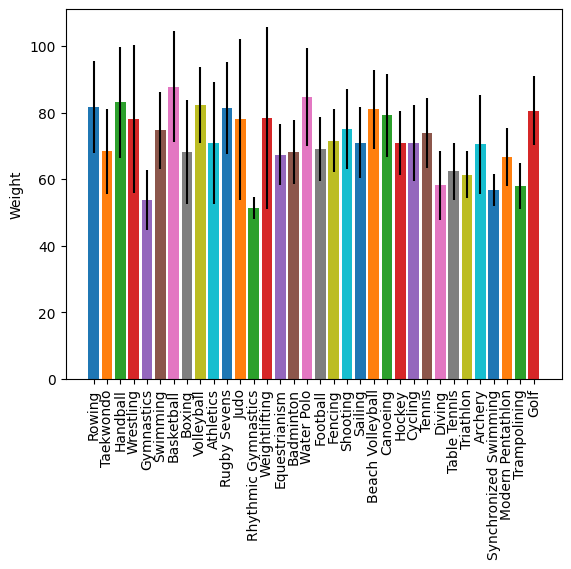

In [23]:
fig, ax = plt.subplots()

# Loop over the different sports branches
for sport in sports:
  # Extract the rows only for this sport
  sport_df = summer_2016_medals[summer_2016_medals['Sport'] == sport]
  # Add a bar for the "Weight" mean with std y error bar
  ax.bar(sport, sport_df['Weight'].mean(),
         yerr=sport_df['Weight'].std())

ax.set_ylabel('Weight')
# ax.set_xticklabels(sports, rotation=90)
plt.xticks(sports, rotation=90)

# Save the figure to file
fig.savefig('sports_weights.png')